This tutorial will demonstrate how to make a diagnostic plot for a planet candidate in TESS data.

In [1]:
import matplotlib.pyplot as plt
import sys
sys.path.append('../code')

Provide some basic information on the star and its planet. In this example, we'll look at TIC-25375553, the host star of confirmed planet TOI-143.01 (WASP-111b).

In [2]:
star = {}
star['id'] = 25375553

planet = {}
planet['period'] = 2.31097
planet['epoch'] = 1325.58249
planet['durationHours'] = 3.129
planet['radius'] = 17.54

We need the lightcurve (time, raw flux, detrended flux) of TIC-25375553 to plot it out. You can get this from your favourite source. In this example let's get the SPOC 2 minute cadence data from Sectors 1 and 28 for this target via lightkurve. 

In [3]:
import lightkurve as lk
import numpy as np

lcfs = lk.search_lightcurvefile('TIC %i' % star['id'], mission='TESS').download_all()
lc_raw = lcfs.PDCSAP_FLUX.stitch()
lc_clean = lc_raw.remove_outliers(sigma=20, sigma_upper=4)
# Mask out transit from detrending (optional)
temp_fold = lc_clean.fold(planet['period'], t0=planet['epoch'])
fractional_duration = (planet['durationHours'] / 24.0) / planet['period']
phase_mask = np.abs(temp_fold.phase) < (fractional_duration * 1.5)
transit_mask = np.in1d(lc_clean.time, temp_fold.time_original[phase_mask])
lc_flat = lc_clean.flatten(mask=transit_mask)

star['time'] = lc_clean.time
star['raw'] = lc_clean.flux
star['flux'] = lc_flat.flux

We also need the difference image data for signal. We already have that from running the first tutorial (example_diffimages.ipynb), so let's just load that back in:

In [4]:
import pickle

fname = 'tic25375553/imageData_planet0_sector28_camera1.pickle'
with open(fname, 'rb') as f:
    imageData = pickle.load(f)

Now we have all we need to make a basic report for the planet signal.

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


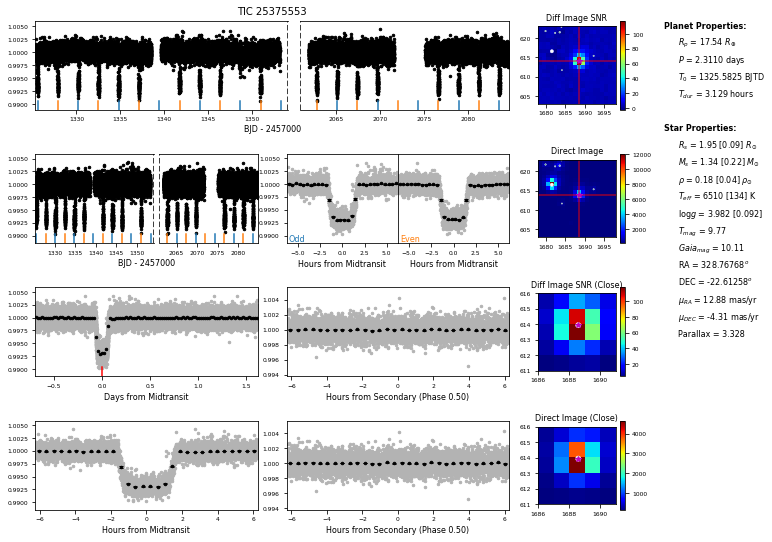

In [5]:
from plots import plot_report

plot_report(star, planet, imageData)

Description of plots:

First column, first row: raw lightcurve, with odd and even transits marked with blue and orange ticks, respectively. Large gaps in the data are skipped over for plotting to ease visibility of data.

First column, second row: detrended lightcurve

First column, third row: phase diagram showing all data

First column, fourth row: close-up of phase diagram centred on transit

Second column, second row: close-up of phase diagram centred on only odd and even transits for comparison

Second column, third row: close-up of phase diagram centred on most significant secondary in lightcurve (default at phase = 0.5; set `planet['phs_sec'] = X` to centre the plot elsewhere)

Second column, fourth row: phase diagram centred on phase = 0.5

Third column, first row: full difference image SNR

Third column, second row: full direct image

Third column, third row: close-up of difference image SNR

Third column, fourth row: close-up of direct image

Fourth column: summary of information about planet and star. Stellar properties are queryied from the TIC catalogue automatically.